##Cost Prediction Model

**Definition** : A linear regression machine learning model for predicting total charges for an associated claim based on person data.

**Machine Learning Tools** : pyspark.ml, pyspark.sql

**Visualization Libraries** : matplotlib, seaborn

**Sourced Tables** :
| Object | Location |
| --- | --- |
| claims | cleansed.adminsystemsclaims.claims |
| encounters | cleansed.adminsystemsclaims.encounters |
| person | cleansed.adminsystemsmember.person |

In [0]:
cost_prediction_df = spark.sql('''
    WITH encounters_data AS (
        SELECT 
            enctrnum,
            personnum
        FROM 
            cleansed.adminsystemsclaims.encounters
        ),
        claims_data AS (
        SELECT
            clmnum,
            enctrnum,
            postingdate,
            totalcharges
        FROM
            cleansed.adminsystemsclaims.claims
        ),
        combined_claims AS (
        SELECT
            encs.personnum,
            cls.clmnum,
            cls.enctrnum,
            cls.postingdate,
            cls.totalcharges
        FROM
            claims_data cls inner join encounters_data encs on cls.enctrnum = encs.enctrnum
        ),
        person_data AS (
    SELECT
        addrcountyofresidence,
        demographicsbirthdate,
        demographicssex,
        disableddisabled,
        fulltimestudent,
        hearingimpaired,
        maritalstatus,
        personnum,
        race
    FROM
        cleansed.adminsystemsmember.person
    )
    SELECT
        coalesce(cast(pd.demographicsbirthdate as DATE), to_date('01-01-0001', 'dd-MM-yyyy')) as birthdate_dt,
        cast(coalesce(cc.clmnum, -1) as INT) as claim_no,
        cast(coalesce(nullif(pd.addrcountyofresidence, ''), 'MISSING') as STRING) as county_txt,
        cast(coalesce(nullif(pd.disableddisabled, ''), 'MISSING') as STRING) as disabled_txt,
        cast(coalesce(cc.enctrnum, -1) as BIGINT) as encounter_no,
        cast(coalesce(nullif(pd.demographicssex, ''), 'MISSING') as STRING) as gender_txt,
        cast(coalesce(nullif(pd.hearingimpaired, ''), 'MISSING') as STRING) as hearingimpaired_txt,
        cast(coalesce(nullif(pd.maritalstatus, ''), 'MISSING') as STRING) as maritalstatus_txt,
        cast(coalesce(pd.personnum, -1) as INT) as patient_id,
        cast(coalesce(pd.race, -1) as INT) as race_no,
        cast(coalesce(nullif(pd.fulltimestudent, ''), 'MISSING') as STRING) as student_txt,
        cast(coalesce(cc.totalcharges, 0) as FLOAT) as totalcharges_amt
    FROM
        combined_claims cc inner join person_data pd on cc.personnum = pd.personnum
''')

##Viewing a Dataframe
**Show vs. Display**
1. Examples of show( ) - Parameters: df.show(n=20, truncate=True, vertical=False)
      - Full dataframe
      - Setting string truncation & number of returned rows
      - Reformatting to vertical alignment
2. Examples of display( )
      - df.display( )
      - display( df ) - enables the Databricks visualization editor

In [0]:
# Full datafraame (default = 20 rows visible)
cost_prediction_df.show()

+------------+---------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|birthdate_dt| claim_no|county_txt|disabled_txt|encounter_no|gender_txt|hearingimpaired_txt|maritalstatus_txt|patient_id|race_no|student_txt|totalcharges_amt|
+------------+---------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|  1914-10-01|191116473|    RAMSEY|     MISSING|  2343427774|         F|            MISSING|                S|       305|     -1|    MISSING|            66.0|
|  1914-10-01|204844473|    RAMSEY|     MISSING|  2442826404|         F|            MISSING|                S|       305|     -1|    MISSING|           284.0|
|  1914-10-01|170141770|    RAMSEY|     MISSING|  2150336715|         F|            MISSING|                S|       305|     -1|    MISSING|           774.0|
|  1914-10-01|197247156|    RAMSEY|     MISSIN

In [0]:
# Example of df with specific number of rows returned and column values truncated
cost_prediction_df.show(n=3, truncate=3)

+------------+--------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|birthdate_dt|claim_no|county_txt|disabled_txt|encounter_no|gender_txt|hearingimpaired_txt|maritalstatus_txt|patient_id|race_no|student_txt|totalcharges_amt|
+------------+--------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|         191|     191|       RAM|         MIS|         234|         F|                MIS|                S|       305|     -1|        MIS|             66.|
|         191|     204|       RAM|         MIS|         244|         F|                MIS|                S|       305|     -1|        MIS|             284|
|         191|     170|       RAM|         MIS|         215|         F|                MIS|                S|       305|     -1|        MIS|             774|
+------------+--------+----------+------------+-----

In [0]:
# Full dataframe shown in a vertical format
cost_prediction_df.show(vertical=True)

-RECORD 0-------------------------
 birthdate_dt        | 1914-10-01 
 claim_no            | 191116473  
 county_txt          | RAMSEY     
 disabled_txt        | MISSING    
 encounter_no        | 2343427774 
 gender_txt          | F          
 hearingimpaired_txt | MISSING    
 maritalstatus_txt   | S          
 patient_id          | 305        
 race_no             | -1         
 student_txt         | MISSING    
 totalcharges_amt    | 66.0       
-RECORD 1-------------------------
 birthdate_dt        | 1914-10-01 
 claim_no            | 204844473  
 county_txt          | RAMSEY     
 disabled_txt        | MISSING    
 encounter_no        | 2442826404 
 gender_txt          | F          
 hearingimpaired_txt | MISSING    
 maritalstatus_txt   | S          
 patient_id          | 305        
 race_no             | -1         
 student_txt         | MISSING    
 totalcharges_amt    | 284.0      
-RECORD 2-------------------------
 birthdate_dt        | 1914-10-01 
 claim_no           

In [0]:
# Full dataframe in downloadable format (1,000 rows default)
cost_prediction_df.display()

birthdate_dt claim_no county_txt disabled_txt encounter_no gender_txt hearingimpaired_txt maritalstatus_txt patient_id race_no student_txt totalcharges_amt 1914-10-01 191116473 RAMSEY MISSING 2343427774 F MISSING S 305 -1 MISSING 66.0 1914-10-01 204844473 RAMSEY MISSING 2442826404 F MISSING S 305 -1 MISSING 284.0 1914-10-01 170141770 RAMSEY MISSING 2150336715 F MISSING S 305 -1 MISSING 774.0 1914-10-01 197247156 RAMSEY MISSING 2348346862 F MISSING S 305 -1 MISSING 24.0 1914-10-01 123672804 RAMSEY MISSING 1845052278 F MISSING S 305 -1 MISSING 842.36 1914-10-01 197873571 RAMSEY MISSING 2349055639 F MISSING S 305 -1 MISSING 179.0 1914-10-01 217001131 RAMSEY MISSING 2453242289 F MISSING S 305 -1 MISSING 351.0 1914-10-01 223834313 RAMSEY MISSING 2544745427 F MISSING S 305 -1 MISSING 360.0 1914-10-01 159526589 RAMSEY MISSING 2141521045 F MISSING S 305 -1 MISSING 774.0 1914-10-01 196303137 RAMSEY MISSING 2347772736 F MISSING S 305 -1 MISSING 62.0 1914-10-01 184176566 RAMSEY MISSING 2250084759 F MISSING S 305 -1 MISSING 870.0 1914-10-01 152676808 RAMSEY MISSING 2047615675 F MISSING S 305 -1 MISSING 227.0 1914-10-01 210451512 RAMSEY MISSING 2447614140 F MISSING S 305 -1 MISSING 454.19 1914-10-01 196295180 RAMSEY MISSING 2347765430 F MISSING S 305 -1 MISSING 49.0 1914-10-01 208943086 RAMSEY MISSING 2446001116 F MISSING S 305 -1 MISSING 236.0 1914-10-01 120340413 RAMSEY MISSING 1842628338 F MISSING S 305 -1 MISSING 842.36 1914-10-01 167493365 RAMSEY MISSING 2148134276 F MISSING S 305 -1 MISSING 255.0 1914-10-01 197020916 RAMSEY MISSING 2348346863 F MISSING S 305 -1 MISSING 62.0 1914-10-01 251796404 RAMSEY MISSING 2653411396 F MISSING S 305 -1 MISSING 282.0 1914-10-01 135787696 RAMSEY MISSING 1944870213 F MISSING S 305 -1 MISSING 278.0 1914-10-01 156669025 RAMSEY MISSING 2050801879 F MISSING S 305 -1 MISSING 258.0 1914-10-01 196050619 RAMSEY MISSING 2347577676 F MISSING S 305 -1 MISSING 100.0 1914-10-01 119940855 RAMSEY MISSING 1842537087 F MISSING S 305 -1 MISSING 67.0 1914-10-01 229146290 RAMSEY MISSING 2549115991 F MISSING S 305 -1 MISSING 242.0 1914-10-01 119838505 RAMSEY MISSING 1842465515 F MISSING S 305 -1 MISSING 30.0 1914-10-01 185692397 RAMSEY MISSING 2251343964 F MISSING S 305 -1 MISSING 68.0 1914-10-01 204685192 RAMSEY MISSING 2442679605 F MISSING S 305 -1 MISSING 800.0 1914-10-01 251988308 RAMSEY MISSING 2653568256 F MISSING S 305 -1 MISSING 282.0 1914-10-01 204930683 RAMSEY MISSING 2442926154 F MISSING S 305 -1 MISSING 501.03 1914-10-01 197133215 RAMSEY MISSING 2348448095 F MISSING S 305 -1 MISSING 329.0 1914-10-01 200096331 RAMSEY MISSING 2350647283 F MISSING S 305 -1 MISSING 10396.76 1914-10-01 142064827 RAMSEY MISSING 1950239976 F MISSING S 305 -1 MISSING 163.0 1914-10-01 144953056 RAMSEY MISSING 2041602706 F MISSING S 305 -1 MISSING 765.0 1914-10-01 127378690 RAMSEY MISSING 1847927456 F MISSING S 305 -1 MISSING 220.0 1914-10-01 251133111 RAMSEY MISSING 2652896821 F MISSING S 305 -1 MISSING 38.0 1914-10-01 166502712 RAMSEY MISSING 2147279168 F MISSING S 305 -1 MISSING 150.0 1914-10-01 135526158 RAMSEY MISSING 1944904840 F MISSING S 305 -1 MISSING 214.0 1914-10-01 163204423 RAMSEY MISSING 2144596163 F MISSING S 305 -1 MISSING 774.0 1914-10-01 119889424 RAMSEY MISSING 1842500979 F MISSING S 305 -1 MISSING 275.0 1914-10-01 120998836 RAMSEY MISSING 1843309005 F MISSING S 305 -1 MISSING 220.0 1914-10-01 142178215 RAMSEY MISSING 1950333879 F MISSING S 305 -1 MISSING 273.0 1914-10-01 148508883 RAMSEY MISSING 2044556074 F MISSING S 305 -1 MISSING 59.0 1914-10-01 160725604 RAMSEY MISSING 2142513356 F MISSING S 305 -1 MISSING 774.0 1914-10-01 119830424 RAMSEY MISSING 1842456734 F MISSING S 305 -1 MISSING 90.0 1914-10-01 211365206 RAMSEY MISSING 2448362762 F MISSING S 305 -1 MISSING 235.0 1914-10-01 215901628 RAMSEY MISSING 2452294143 F MISSING S 305 -1 MISSING 351.0 1914-10-01 117687581 RAMSEY MISSING 1840893690 F MISSING S 305 -1 MISSING 173.0 1914-10-01 137573728 RAMSEY MISSING 1946270487 F MISSING S 305 -1 MISSING 690.33 1914-10

In [0]:
# Display method to enable visualizations editor w/ examples
display(cost_prediction_df)

birthdate_dt claim_no county_txt disabled_txt encounter_no gender_txt hearingimpaired_txt maritalstatus_txt patient_id race_no student_txt totalcharges_amt 1914-10-01 191116473 RAMSEY MISSING 2343427774 F MISSING S 305 -1 MISSING 66.0 1914-10-01 204844473 RAMSEY MISSING 2442826404 F MISSING S 305 -1 MISSING 284.0 1914-10-01 170141770 RAMSEY MISSING 2150336715 F MISSING S 305 -1 MISSING 774.0 1914-10-01 197247156 RAMSEY MISSING 2348346862 F MISSING S 305 -1 MISSING 24.0 1914-10-01 123672804 RAMSEY MISSING 1845052278 F MISSING S 305 -1 MISSING 842.36 1914-10-01 197873571 RAMSEY MISSING 2349055639 F MISSING S 305 -1 MISSING 179.0 1914-10-01 217001131 RAMSEY MISSING 2453242289 F MISSING S 305 -1 MISSING 351.0 1914-10-01 223834313 RAMSEY MISSING 2544745427 F MISSING S 305 -1 MISSING 360.0 1914-10-01 159526589 RAMSEY MISSING 2141521045 F MISSING S 305 -1 MISSING 774.0 1914-10-01 196303137 RAMSEY MISSING 2347772736 F MISSING S 305 -1 MISSING 62.0 1914-10-01 184176566 RAMSEY MISSING 2250084759 F MISSING S 305 -1 MISSING 870.0 1914-10-01 152676808 RAMSEY MISSING 2047615675 F MISSING S 305 -1 MISSING 227.0 1914-10-01 210451512 RAMSEY MISSING 2447614140 F MISSING S 305 -1 MISSING 454.19 1914-10-01 196295180 RAMSEY MISSING 2347765430 F MISSING S 305 -1 MISSING 49.0 1914-10-01 208943086 RAMSEY MISSING 2446001116 F MISSING S 305 -1 MISSING 236.0 1914-10-01 120340413 RAMSEY MISSING 1842628338 F MISSING S 305 -1 MISSING 842.36 1914-10-01 167493365 RAMSEY MISSING 2148134276 F MISSING S 305 -1 MISSING 255.0 1914-10-01 197020916 RAMSEY MISSING 2348346863 F MISSING S 305 -1 MISSING 62.0 1914-10-01 251796404 RAMSEY MISSING 2653411396 F MISSING S 305 -1 MISSING 282.0 1914-10-01 135787696 RAMSEY MISSING 1944870213 F MISSING S 305 -1 MISSING 278.0 1914-10-01 156669025 RAMSEY MISSING 2050801879 F MISSING S 305 -1 MISSING 258.0 1914-10-01 196050619 RAMSEY MISSING 2347577676 F MISSING S 305 -1 MISSING 100.0 1914-10-01 119940855 RAMSEY MISSING 1842537087 F MISSING S 305 -1 MISSING 67.0 1914-10-01 229146290 RAMSEY MISSING 2549115991 F MISSING S 305 -1 MISSING 242.0 1914-10-01 119838505 RAMSEY MISSING 1842465515 F MISSING S 305 -1 MISSING 30.0 1914-10-01 185692397 RAMSEY MISSING 2251343964 F MISSING S 305 -1 MISSING 68.0 1914-10-01 204685192 RAMSEY MISSING 2442679605 F MISSING S 305 -1 MISSING 800.0 1914-10-01 251988308 RAMSEY MISSING 2653568256 F MISSING S 305 -1 MISSING 282.0 1914-10-01 204930683 RAMSEY MISSING 2442926154 F MISSING S 305 -1 MISSING 501.03 1914-10-01 197133215 RAMSEY MISSING 2348448095 F MISSING S 305 -1 MISSING 329.0 1914-10-01 200096331 RAMSEY MISSING 2350647283 F MISSING S 305 -1 MISSING 10396.76 1914-10-01 142064827 RAMSEY MISSING 1950239976 F MISSING S 305 -1 MISSING 163.0 1914-10-01 144953056 RAMSEY MISSING 2041602706 F MISSING S 305 -1 MISSING 765.0 1914-10-01 127378690 RAMSEY MISSING 1847927456 F MISSING S 305 -1 MISSING 220.0 1914-10-01 251133111 RAMSEY MISSING 2652896821 F MISSING S 305 -1 MISSING 38.0 1914-10-01 166502712 RAMSEY MISSING 2147279168 F MISSING S 305 -1 MISSING 150.0 1914-10-01 135526158 RAMSEY MISSING 1944904840 F MISSING S 305 -1 MISSING 214.0 1914-10-01 163204423 RAMSEY MISSING 2144596163 F MISSING S 305 -1 MISSING 774.0 1914-10-01 119889424 RAMSEY MISSING 1842500979 F MISSING S 305 -1 MISSING 275.0 1914-10-01 120998836 RAMSEY MISSING 1843309005 F MISSING S 305 -1 MISSING 220.0 1914-10-01 142178215 RAMSEY MISSING 1950333879 F MISSING S 305 -1 MISSING 273.0 1914-10-01 148508883 RAMSEY MISSING 2044556074 F MISSING S 305 -1 MISSING 59.0 1914-10-01 160725604 RAMSEY MISSING 2142513356 F MISSING S 305 -1 MISSING 774.0 1914-10-01 119830424 RAMSEY MISSING 1842456734 F MISSING S 305 -1 MISSING 90.0 1914-10-01 211365206 RAMSEY MISSING 2448362762 F MISSING S 305 -1 MISSING 235.0 1914-10-01 215901628 RAMSEY MISSING 2452294143 F MISSING S 305 -1 MISSING 351.0 1914-10-01 117687581 RAMSEY MISSING 1840893690 F MISSING S 305 -1 MISSING 173.0 1914-10-01 137573728 RAMSEY MISSING 1946270487 F MISSING S 305 -1 MISSING 690.33 1914-10

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

Databricks data profile. Run in Databricks to view.

In [0]:
# Method use when array is expected to be small. Parameters df.head(number of rows to return)
cost_prediction_df.head()

Row(birthdate_dt=datetime.date(1914, 10, 1), claim_no=191116473, county_txt='RAMSEY', disabled_txt='MISSING', encounter_no=2343427774, gender_txt='F', hearingimpaired_txt='MISSING', maritalstatus_txt='S', patient_id=305, race_no=-1, student_txt='MISSING', totalcharges_amt=66.0)

##Dataframe Analysis
**Summary vs. Describe**
1. Examples of statistics
      - Summary
      - Describe
      - Specifc Columns Describe --- parameters(strings, tuple): cost_prediction_df.describe(column, column).show()
2. Examples of schema and dataframe details
      - printSchema vs. dtypes
      - Schema to json
      - List of columns
      - Shape (rows, columns)
      - Return dataframe with null value count for each column

In [0]:
# Summary statistics for dataframe (larger set)
cost_prediction_df.summary().show()

+-------+--------------------+----------+------------+--------------------+----------+-------------------+-----------------+------------------+------------------+-----------+-----------------+
|summary|            claim_no|county_txt|disabled_txt|        encounter_no|gender_txt|hearingimpaired_txt|maritalstatus_txt|        patient_id|           race_no|student_txt| totalcharges_amt|
+-------+--------------------+----------+------------+--------------------+----------+-------------------+-----------------+------------------+------------------+-----------+-----------------+
|  count|           258147570| 258147570|   258147570|           258147570| 258147570|          258147570|        258147570|         258147570|         258147570|  258147570|        258147570|
|   mean|2.5877116333713317E8|      NULL|        NULL|2.6669988567293277E9|      NULL|               NULL|             NULL|    3570143.527587|0.4009375257725649|       NULL| 759.302217480483|
| stddev|  8.23953208396965E7|     

In [0]:
# Statistics for dataframe (smaller set)
cost_prediction_df.describe().show()

+-------+--------------------+----------+------------+--------------------+----------+-------------------+-----------------+------------------+------------------+-----------+-----------------+
|summary|            claim_no|county_txt|disabled_txt|        encounter_no|gender_txt|hearingimpaired_txt|maritalstatus_txt|        patient_id|           race_no|student_txt| totalcharges_amt|
+-------+--------------------+----------+------------+--------------------+----------+-------------------+-----------------+------------------+------------------+-----------+-----------------+
|  count|           258147570| 258147570|   258147570|           258147570| 258147570|          258147570|        258147570|         258147570|         258147570|  258147570|        258147570|
|   mean|2.5877116333713317E8|      NULL|        NULL|2.6669988567293277E9|      NULL|               NULL|             NULL|    3570143.527587|0.4009375257725649|       NULL| 759.302217480483|
| stddev|  8.23953208396965E7|     

In [0]:
# Smaller dataframe summary statistics on specific column
cost_prediction_df.describe('totalcharges_amt').show()

+-------+-----------------+
|summary| totalcharges_amt|
+-------+-----------------+
|  count|        258147570|
|   mean|759.3022174804829|
| stddev|51411.02559230207|
|    min|       -5805866.0|
|    max|      8.1536378E8|
+-------+-----------------+



In [0]:
# Spark schema (column_name, data_type, nullable boolean)
cost_prediction_df.printSchema()

root
 |-- birthdate_dt: date (nullable = true)
 |-- claim_no: integer (nullable = false)
 |-- county_txt: string (nullable = false)
 |-- disabled_txt: string (nullable = false)
 |-- encounter_no: long (nullable = true)
 |-- gender_txt: string (nullable = false)
 |-- hearingimpaired_txt: string (nullable = false)
 |-- maritalstatus_txt: string (nullable = false)
 |-- patient_id: integer (nullable = false)
 |-- race_no: integer (nullable = false)
 |-- student_txt: string (nullable = false)
 |-- totalcharges_amt: float (nullable = false)



In [0]:
# List version of the dataframe schema
cost_prediction_df.dtypes

[('birthdate_dt', 'date'),
 ('claim_no', 'int'),
 ('county_txt', 'string'),
 ('disabled_txt', 'string'),
 ('encounter_no', 'bigint'),
 ('gender_txt', 'string'),
 ('hearingimpaired_txt', 'string'),
 ('maritalstatus_txt', 'string'),
 ('patient_id', 'int'),
 ('race_no', 'int'),
 ('student_txt', 'string'),
 ('totalcharges_amt', 'float')]

In [0]:
# Method for changing the schema to json format
cost_prediction_df.schema.json()

'{"fields":[{"metadata":{},"name":"birthdate_dt","nullable":true,"type":"date"},{"metadata":{},"name":"claim_no","nullable":false,"type":"integer"},{"metadata":{},"name":"county_txt","nullable":false,"type":"string"},{"metadata":{},"name":"disabled_txt","nullable":false,"type":"string"},{"metadata":{},"name":"encounter_no","nullable":true,"type":"long"},{"metadata":{},"name":"gender_txt","nullable":false,"type":"string"},{"metadata":{},"name":"hearingimpaired_txt","nullable":false,"type":"string"},{"metadata":{},"name":"maritalstatus_txt","nullable":false,"type":"string"},{"metadata":{},"name":"patient_id","nullable":false,"type":"integer"},{"metadata":{},"name":"race_no","nullable":false,"type":"integer"},{"metadata":{},"name":"student_txt","nullable":false,"type":"string"},{"metadata":{},"name":"totalcharges_amt","nullable":false,"type":"float"}],"type":"struct"}'

In [0]:
# List of all the dataframe elements 
cost_prediction_df.columns

['birthdate_dt',
 'claim_no',
 'county_txt',
 'disabled_txt',
 'encounter_no',
 'gender_txt',
 'hearingimpaired_txt',
 'maritalstatus_txt',
 'patient_id',
 'race_no',
 'student_txt',
 'totalcharges_amt']

In [0]:
# Methods for obtaining the dataframe shape (rows, columns)
cost_prediction_df.count(), len(cost_prediction_df.columns)

(258147570, 12)

In [0]:
# Returns a dataframe with null value count for each column
from pyspark.sql.functions import col, count, when

result = cost_prediction_df.select([count(when(col(c).isNull(), c)).alias(c) for c in cost_prediction_df.columns])

display(result)

birthdate_dt claim_no county_txt disabled_txt encounter_no gender_txt hearingimpaired_txt maritalstatus_txt patient_id race_no student_txt totalcharges_amt 0 0 0 0 0 0 0 0 0 0 0 0

##Databricks ML Steps

1. Convert categorical values into numerical values & alias the column names
2. Determine correlation of columns
3. Create the model
4. Fit the model
5. Evaluation of training and test data 

In [0]:
# Converting categorical values into numerical values
cost_prediction_df.head()

Row(birthdate_dt=datetime.date(1914, 10, 1), claim_no=191116473, county_txt='RAMSEY', disabled_txt='MISSING', encounter_no=2343427774, gender_txt='F', hearingimpaired_txt='MISSING', maritalstatus_txt='S', patient_id=305, race_no=-1, student_txt='MISSING', totalcharges_amt=66.0)

In [0]:
from pyspark.sql.functions import when, col

# Disabled Status: P - Permanent; T - Temporary; 
cost_prediction_df = cost_prediction_df.withColumn('disabled_txt', 
    when(col('disabled_txt') == 'P', 0)
    .when(col('disabled_txt') == 'T', 1)
    .when(col('disabled_txt') == None, 2)
    .otherwise(3)
)

# Student Status: N - No; Y - Yes
cost_prediction_df = cost_prediction_df.withColumn('student_txt', 
    when(col('student_txt') == 'N', 0)
    .when(col('student_txt') == 'Y', 1)
    .otherwise(2)
)

# Gender: F - Female; M - Male
cost_prediction_df = cost_prediction_df.withColumn('gender_txt', 
    when(col('gender_txt') == 'F', 0)
    .when(col('gender_txt') == 'M', 1)
    .otherwise(2)
)

# Hearing Impaired: N - No; Y - Yes
cost_prediction_df = cost_prediction_df.withColumn('hearingimpaired_txt', 
    when(col('hearingimpaired_txt') == 'N', 0)
    .when(col('hearingimpaired_txt') == 'Y', 1)
    .otherwise(2)
)

# Marital Status: D - Divorced; P - Domestic Partner; M - Married; X - Separated; S - Single; U - Unknown; N - Unmarried; W - Widowed
cost_prediction_df = cost_prediction_df.withColumn('maritalstatus_txt', 
    when(col('maritalstatus_txt') == 'D', 0)
    .when(col('maritalstatus_txt') == 'P', 1)
    .when(col('maritalstatus_txt') == 'M', 2)
    .when(col('maritalstatus_txt') == 'X', 3)
    .when(col('maritalstatus_txt') == 'S', 4)
    .when(col('maritalstatus_txt') == 'U', 5)
    .when(col('maritalstatus_txt') == 'N', 6)
    .when(col('maritalstatus_txt') == 'W', 7)
    .when(col('maritalstatus_txt') == None, 8)
    .otherwise(9)
)

cost_prediction_df.show(5)

+------------+---------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|birthdate_dt| claim_no|county_txt|disabled_txt|encounter_no|gender_txt|hearingimpaired_txt|maritalstatus_txt|patient_id|race_no|student_txt|totalcharges_amt|
+------------+---------+----------+------------+------------+----------+-------------------+-----------------+----------+-------+-----------+----------------+
|  1914-10-01|191116473|    RAMSEY|           3|  2343427774|         0|                  2|                4|       305|     -1|          2|            66.0|
|  1914-10-01|204844473|    RAMSEY|           3|  2442826404|         0|                  2|                4|       305|     -1|          2|           284.0|
|  1914-10-01|170141770|    RAMSEY|           3|  2150336715|         0|                  2|                4|       305|     -1|          2|           774.0|
|  1914-10-01|197247156|    RAMSEY|           

In [0]:
# Alias VectorAssembler inputs
cost_prediction_df_va = cost_prediction_df\
    .select(
        col('disabled_txt').alias('disabled'),
        col('student_txt').alias('student'),
        col('gender_txt').alias('gender'),
        col('hearingimpaired_txt').alias('hearingimpaired'),
        col('maritalstatus_txt').alias('maritalstatus'),
        col('totalcharges_amt').alias('totalcharges')
    ) 

                 disabled   student  ...  maritalstatus  totalcharges
disabled         1.000000  0.001152  ...       0.036537     -0.000947
student          0.001152  1.000000  ...       0.038806      0.000401
gender          -0.003503  0.016303  ...       0.008170      0.001293
hearingimpaired  0.018133  0.001045  ...       0.001827     -0.000002
maritalstatus    0.036537  0.038806  ...       1.000000     -0.000304
totalcharges    -0.000947  0.000401  ...      -0.000304      1.000000

[6 rows x 6 columns]


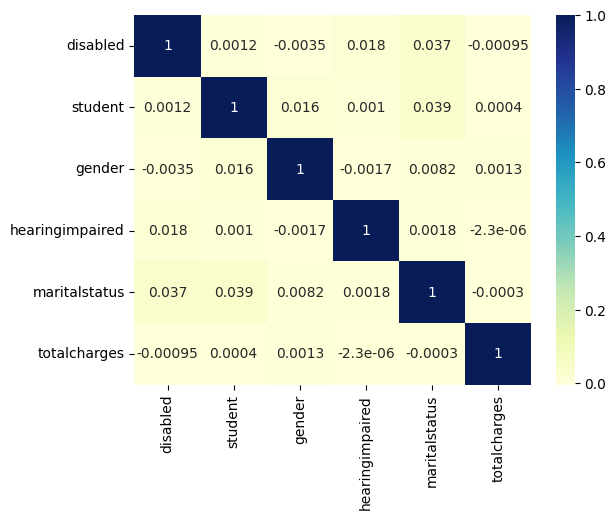

In [0]:
import matplotlib.pyplot as mp 
import pandas as pd 
import seaborn as sb 

# cost_prediction_df_va = cost_prediction_df_va.na.drop()

cost_prediction_df_va = cost_prediction_df_va.fillna(0)

data = cost_prediction_df_va.toPandas()

print(data.corr()) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
mp.show() 

In [0]:
# Create the test train split 
train_data, test_data = cost_prediction_df_va.randomSplit([0.7, 0.3], seed=42)

In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
# Create the vector assembler 
vectors = VectorAssembler(inputCols=[
    'disabled',
    'student',
    'gender',
    'hearingimpaired',
    'maritalstatus'
    ],
    outputCol='features')

vector_data = vectors.transform(train_data)

vector_data.show(5)

+--------+-------+------+---------------+-------------+------------+-------------------+
|disabled|student|gender|hearingimpaired|maritalstatus|totalcharges|           features|
+--------+-------+------+---------------+-------------+------------+-------------------+
|       0|      0|     0|              2|            9|       -51.0|(5,[3,4],[2.0,9.0])|
|       0|      0|     0|              2|            9|        29.0|(5,[3,4],[2.0,9.0])|
|       0|      0|     0|              2|            9|        31.0|(5,[3,4],[2.0,9.0])|
|       0|      0|     0|              2|            9|        32.0|(5,[3,4],[2.0,9.0])|
|       0|      0|     0|              2|            9|        40.0|(5,[3,4],[2.0,9.0])|
+--------+-------+------+---------------+-------------+------------+-------------------+
only showing top 5 rows



In [0]:
# Handle the nulls
vector_data = vector_data.fillna(0)

features_data = vector_data.select([
    'features',
    'totalcharges'
])

features_data.show()

+-------------------+------------+
|           features|totalcharges|
+-------------------+------------+
|(5,[3,4],[2.0,9.0])|       -51.0|
|(5,[3,4],[2.0,9.0])|        29.0|
|(5,[3,4],[2.0,9.0])|        31.0|
|(5,[3,4],[2.0,9.0])|        32.0|
|(5,[3,4],[2.0,9.0])|        40.0|
|(5,[3,4],[2.0,9.0])|        50.0|
|(5,[3,4],[2.0,9.0])|        51.0|
|(5,[3,4],[2.0,9.0])|        77.0|
|(5,[3,4],[2.0,9.0])|        96.0|
|(5,[3,4],[2.0,9.0])|       166.0|
|(5,[3,4],[2.0,9.0])|       166.0|
|(5,[3,4],[2.0,9.0])|       171.0|
|(5,[3,4],[2.0,9.0])|       197.0|
|(5,[3,4],[2.0,9.0])|       237.0|
|(5,[3,4],[2.0,9.0])|       328.0|
|(5,[3,4],[2.0,9.0])|       363.0|
|(5,[3,4],[2.0,9.0])|       364.0|
|(5,[3,4],[2.0,9.0])|       380.0|
|(5,[3,4],[2.0,9.0])|       438.0|
|(5,[3,4],[2.0,9.0])|       497.0|
+-------------------+------------+
only showing top 20 rows



In [0]:
# Create the model
lr = LinearRegression(labelCol='totalcharges', featuresCol='features')

# Fit the model
model = lr.fit(features_data)

In [0]:
# Obtain the r squared score
summary = model.summary

print(summary.r2)

2.0391156285715084e-06


In [0]:
# Build the evaluator
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='totalcharges', metricName='r2')

In [0]:
# Instantiate the test data
vector_test = vectors.transform(test_data)

In [0]:
features_test = vector_test.select([
    'features',
    'totalcharges'
])

In [0]:
# Add the test data to the model
test_transform = model.transform(features_test)

In [0]:
# Evaluate the test data model
evaluator.evaluate(test_transform)

0.00010979327905757952